# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [30]:
import requests

base_url = 'https://boardgamegeek.com/browse/boardgame/page/'
url_get = requests.get(base_url)

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [31]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html ng-app="GeekApp" lang="en-US" ng-cloak>\n<head>\n\t<meta charset=\'utf-8\'>\n\t<meta id="vp" name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t\t<script>\n\t\t\twindow.addEventListener( \'DOMContentLoaded\',  function() {\n\t\t\t\tvar width = document.documentElement.clientWidth || window.innerWidth;\n\t\t\t\tif (width < 960) {\n\t\t\t\t\tvar mvp = document.getElementById(\'vp\');\n\t\t\t\t\t// android debugging\n\t\t\t\t\tmvp.setAttribute(\'content\',\'width=960\');\n\t\t\t\t}\n\t\t\t});\n\t\t</script>\n\t\t<meta cont'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [32]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content, "html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

I'll parse the HTML content using BeautifulSoup and identify the table containing the list of board games. The table tag with the class collection_table contains the data we need. And We'll extract information such as the game's name, rating, and number of voters.

In [33]:
table = soup.find('table', {'class': 'collection_table'})
print(table.prettify()[1:500])

table cellpadding="0" cellspacing="1" class="collection_table" id="collectionitems" width="100%">
 <tr>
  <th class="collection_bggrating">
   <a href="/browse/boardgame?sort=rank&amp;sortdir=desc">
    Board Game Rank
    <img alt="ascending sort" border="0" hspace="5" src="https://cf.geekdo-static.com/images/collection/arrow_up.gif"/>
   </a>
  </th>
  <th class="collection_thumbnail">
   <span class="sr-only">
    Thumbnail image
   </span>
  </th>
  <th class="collection_title">
   <a href=


Next, we need to find the row length.

In [34]:
rows = table.find_all('tr', {'id': lambda x: x and x.startswith('row_')})
row_length = len(rows)

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [35]:
games = []

for page in range(1, 11):
    url = f'{base_url}{page}'
    url_get = requests.get(url)
    
    soup = BeautifulSoup(url_get.content, "html.parser")
    
    table = soup.find('table', {'class': 'collection_table'})
    
    rows = table.find_all('tr', {'id': lambda x: x and x.startswith('row_')})
    
    for row in rows:
        name = row.find('td', {'class': 'collection_objectname'}).a.text.strip()
        rating = row.find('td', {'class': 'collection_bggrating'}).text.strip()
        num_voters = row.find_all('td', {'class': 'collection_bggrating'})[2].text.strip()
        games.append((name, rating, num_voters))
    
    print(f'Page {page} scraped.')

games[:5]

Page 1 scraped.
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Page 7 scraped.
Page 8 scraped.
Page 9 scraped.
Page 10 scraped.


[('Brass: Birmingham', '8.412', '47156'),
 ('Pandemic Legacy: Season 1', '8.377', '53916'),
 ('Gloomhaven', '8.348', '62725'),
 ('Ark Nova', '8.338', '45167'),
 ('Twilight Imperium: Fourth Edition', '8.238', '24248')]

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [36]:
import pandas as pd

df = pd.DataFrame(games, columns=['Name', 'Rating', 'Num_Voters'])
df.head()

,Name,Rating,Num_Voters
0,Brass: Birmingham,8.412,47156
1,Pandemic Legacy: Season 1,8.377,53916
2,Gloomhaven,8.348,62725
3,Ark Nova,8.338,45167
4,Twilight Imperium: Fourth Edition,8.238,24248


### Data Cleansing

I'm cleaning my data with changing the type of feature and replace a ',' with none. And also i check for data empty just to make sure no null data 

In [37]:
df['Rating'] = df['Rating'].astype(float)
df['Num_Voters'] = df['Num_Voters'].str.replace(',', '').astype(int)

In [38]:
df.dtypes

Name           object
Rating        float64
Num_Voters      int32
dtype: object

In [49]:
df.isna().sum()

Name            0
Rating          0
Num_Voters      0
Rating_Group    0
dtype: int64

In [39]:
df

,Name,Rating,Num_Voters
0,Brass: Birmingham,8.412,47156
1,Pandemic Legacy: Season 1,8.377,53916
2,Gloomhaven,8.348,62725
3,Ark Nova,8.338,45167
4,Twilight Imperium: Fourth Edition,8.238,24248
...,...,...,...
995,Lanterns: The Harvest Festival,6.618,11495
996,Evergreen,6.617,2877
997,Stella: Dixit Universe,6.617,3583
998,Condottiere,6.616,10279


### Data Visualization

I want to see the connection between ratings and voters number also what is the top voted board games based on voters number and the last is the top rated board games

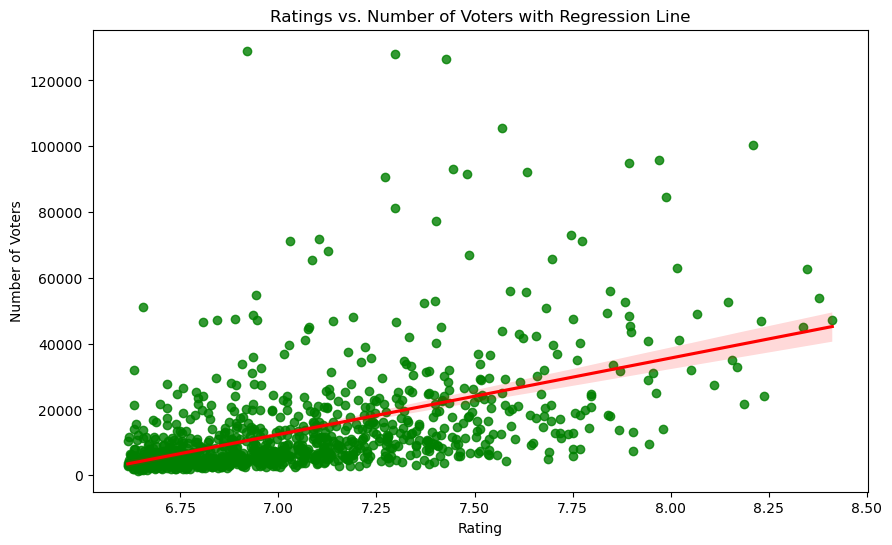

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Num_Voters', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Ratings vs. Number of Voters')
plt.xlabel('Rating')
plt.ylabel('Number of Voters')
plt.show()

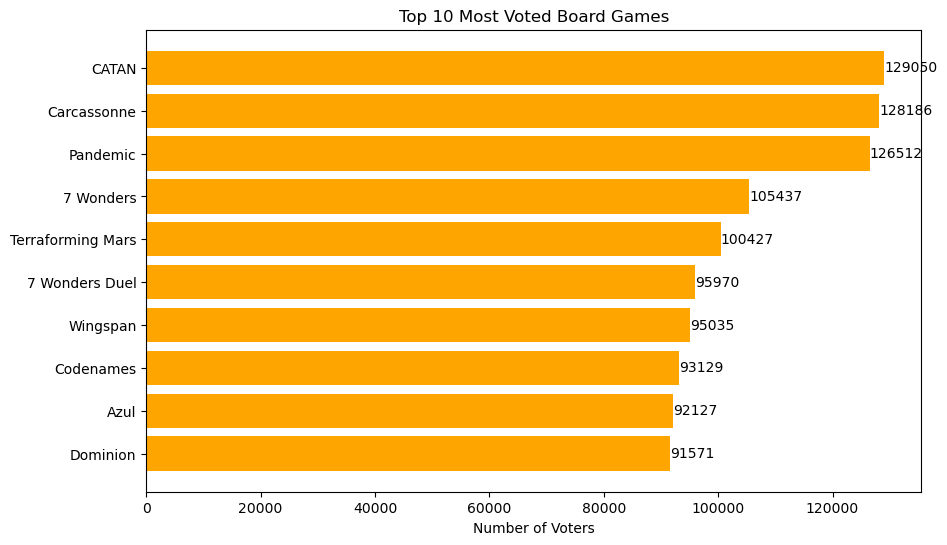

In [59]:
top_10_voted = df.sort_values(by='Num_Voters', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_voted['Name'], top_10_voted['Num_Voters'], color='orange')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left')

plt.title('Top 10 Most Voted Board Games')
plt.xlabel('Number of Voters')
plt.gca().invert_yaxis()
plt.show()


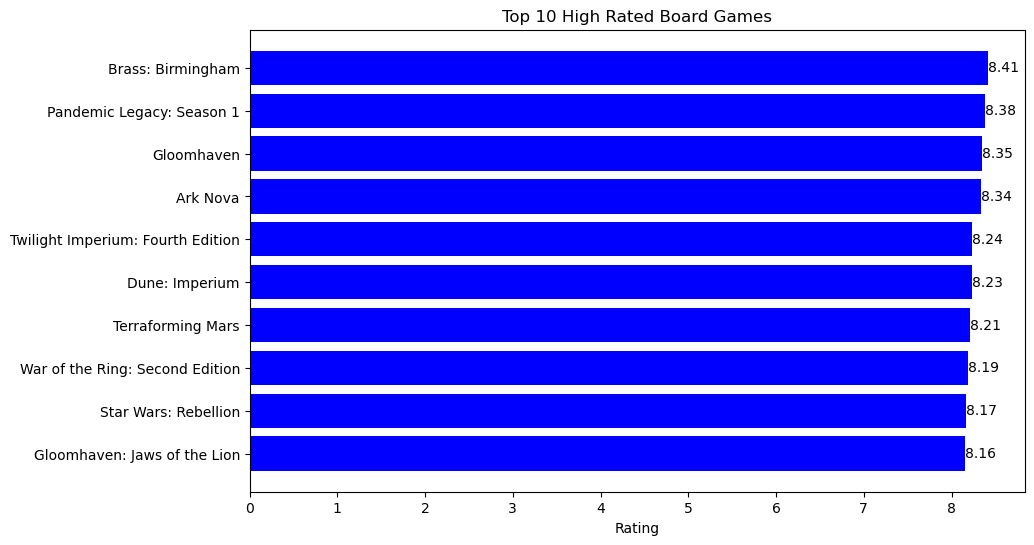

In [64]:
top_10_rated = df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_rated['Name'], top_10_rated['Rating'], color='blue')

# Display full float values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.title('Top 10 High Rated Board Games')
plt.xlabel('Rating')
plt.gca().invert_yaxis()
plt.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

Based on graph, the more you have voters doesn't mean you can have a high rating games. Most games have a moderate number of voters, but there are a few games with significantly higher numbers of voters. Higher ratings do not necessarily correspond to a higher number of voters. Games with ratings between 6.75 and 7.75 have a wide range in voter numbers, while very few highly-rated games have an exceptionally large voter base.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.